<a href="https://colab.research.google.com/github/HenriARM/ML/blob/master/linear-regression/linear-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple linear regression is a type of regression analysis where the number of 
independent variables is one and there is a linear relationship between the independent(x) and dependent(y) variable. 

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# linear regression explained: https://towardsdatascience.com/introduction-to-machine-learning-algorithms-linear-regression-14c4e325882a
# training data: https://www.kaggle.com/andonians/random-linear-regression/data

import pandas as pd
import numpy as np

train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/linear-regression/data/train.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/linear-regression/data/test.csv')

In [0]:
x_train = np.array(train['x'])
y_train = np.array(train['y'])

# there was nan coordinate in dataset
x_train = np.delete(x_train, 213).reshape(-1,1)
y_train = np.delete(y_train, 213).reshape(-1,1)

x_test = np.array(test['x']).reshape(-1,1)
y_test = np.array(test['y']).reshape(-1,1)

In [0]:
# linear equation: y = k * x + b (predicting straight line which has min mse)
# mse - mean square error (used as a cost function)

n = 699 # data size
lr = 0.0001 # learning rate

# initialize coefficients with zeros
b = 0
k = 0
epochs = 0
while(epochs < 10):
    y_prediction = k * x_train + b
    error = y_prediction - y_train
    mse = np.sum(error **2)/n
    print(mse)
    # we found b and k derivatives from cost function (already in brackets)
    # and using gradient descent we change coefficient values (since we need to minimize mse, we minus gradient from old value)
    b = b - lr * (2/n * np.sum(error))
    k = k - lr * (2/n * np.sum(error * x_train))
    epochs += 1

3340.1248261786727
375.45468139435286
48.419854883577905
12.344415320611308
8.364908150806476
7.925925612296182
7.877500809021856
7.8721587012638725
7.871569075654194
7.871503699690063


Score: 0.9887714997313881


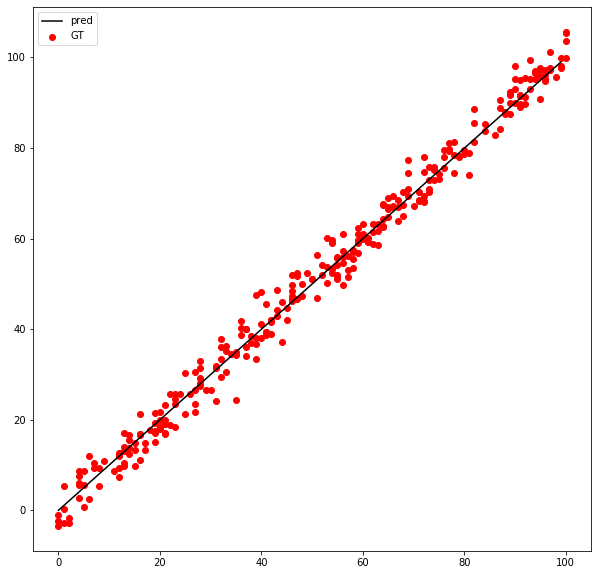

In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

y_prediction = k * x_test + b
print('Score:',r2_score(y_test,y_prediction))

y_plot = []
for i in range(100):
    y_plot.append(k * i + b)
plt.figure(figsize=(10,10))
plt.scatter(x_test,y_test,color='red',label='GT')
plt.plot(range(len(y_plot)),y_plot,color='black',label = 'pred')
plt.legend()
plt.show()

In [0]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

r = LinearRegression(normalize=True)
r.fit(x_train,y_train)
print('Score: ',r2_score(y_test,r.predict(x_test)))

Score:  0.9888014444327563
